In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("16_QSurvey.csv", encoding='ISO-8859-1')

df['Treatment'] = df['Treatment'].str.strip().str.lower()
df_direct = df[df['Treatment'] == 'direct'].copy()

df_direct_clean = df_direct[['Nationalism', 'Message_Efficacy']].dropna()
model_direct = smf.ols('Message_Efficacy ~ Nationalism', data=df_direct_clean).fit()

print(model_direct.summary())


                            OLS Regression Results                            
Dep. Variable:       Message_Efficacy   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.743
Date:                Sat, 19 Jul 2025   Prob (F-statistic):             0.0992
Time:                        05:20:51   Log-Likelihood:                -234.52
No. Observations:                 201   AIC:                             473.0
Df Residuals:                     199   BIC:                             479.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5751      0.284      2.028      

In [3]:

df_interaction = df[['Message_Efficacy', 'Nationalism', 'Treatment']].dropna()

interaction_model = smf.ols('Message_Efficacy ~ Nationalism * Treatment', data=df_interaction).fit()
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:       Message_Efficacy   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.248
Date:                Sat, 19 Jul 2025   Prob (F-statistic):             0.0219
Time:                        05:20:51   Log-Likelihood:                -460.69
No. Observations:                 402   AIC:                             929.4
Df Residuals:                     398   BIC:                             945.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

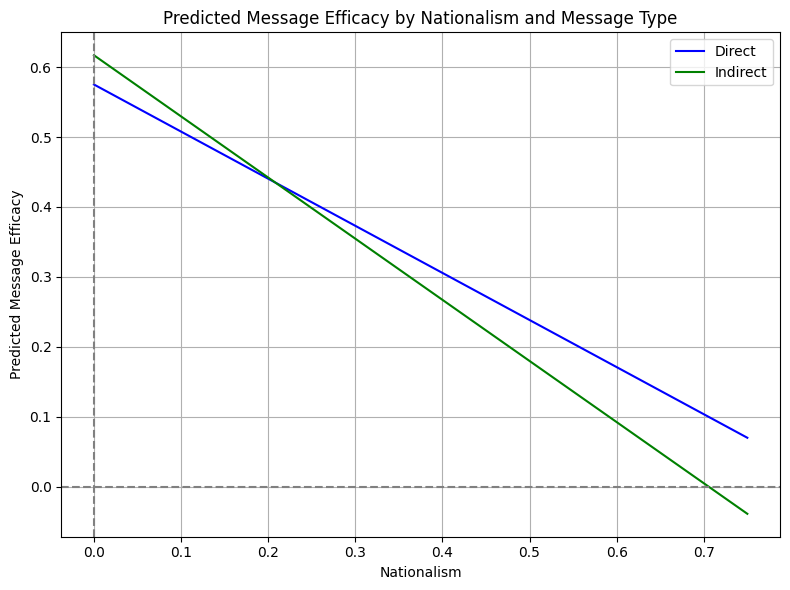

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up range of nationalism values
nationalism_range = np.linspace(df['Nationalism'].min(), df['Nationalism'].max(), 100)

# Predict values for both groups using the regression coefficients
intercept = 0.5751
nationalism_coef = -0.6735
indirect_intercept_shift = 0.0418
indirect_interaction = -0.2007

# Direct prediction line
direct_pred = intercept + nationalism_coef * nationalism_range

# Indirect prediction line
indirect_pred = (intercept + indirect_intercept_shift +
                 (nationalism_coef + indirect_interaction) * nationalism_range)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(nationalism_range, direct_pred, label='Direct', color='blue')
plt.plot(nationalism_range, indirect_pred, label='Indirect', color='green')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title('Predicted Message Efficacy by Nationalism and Message Type')
plt.xlabel('Nationalism')
plt.ylabel('Predicted Message Efficacy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


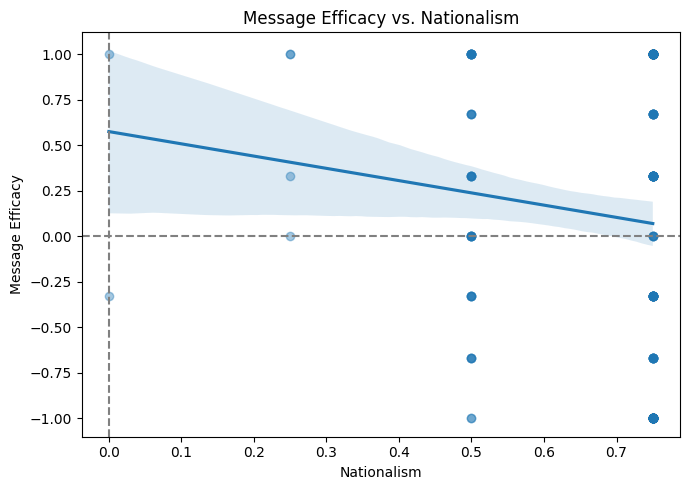

                            OLS Regression Results                            
Dep. Variable:       Message_Efficacy   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.743
Date:                Sat, 19 Jul 2025   Prob (F-statistic):             0.0992
Time:                        05:20:51   Log-Likelihood:                -234.52
No. Observations:                 201   AIC:                             473.0
Df Residuals:                     199   BIC:                             479.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5751      0.284      2.028      

In [5]:
plt.figure(figsize=(7, 5))
sns.regplot(data=df_direct_clean, x='Nationalism', y='Message_Efficacy', scatter_kws={'alpha': 0.4})
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title('Message Efficacy vs. Nationalism')
plt.xlabel('Nationalism')
plt.ylabel('Message Efficacy')
plt.tight_layout()
plt.show()

model = smf.ols('Message_Efficacy ~ Nationalism', data=df_direct_clean.dropna()).fit()
print(model.summary())